In [1]:
import os
os.chdir('../lib')
from SVD import *
import pickle
from matplotlib import pyplot as plt
import numpy as np

## SVD

In [4]:
# set up
svd = SVD('../data/ratings.csv')
trainset, testset = svd.split(0.2)

###  Using biased SGD

In [5]:
# tuning parameters
reg_list = [0.1,0.15,0.2,0.25]
lr_list = [0.001,0.005, 0.01]
rank_list = [5,10,20]
svd.gridParams(reg = reg_list, lr = lr_list, rank = rank_list)
# svd.tuningParams(trainset, verbose = False)

NameError: name 'sgd' is not defined

In [4]:
# save the best parameters
# sgd_best_params = sgd.best_params
# pickle.dump(sgd_best_params, open( "../output/sgd_best_params.p", "wb" ))
sgd_best_params = pickle.load(open( "../output/sgd_best_params.p", "rb" ))
print("Best learning rate: {}; \nBest lambda: {}; \nBest rank: {}".format(sgd_best_params[0],sgd_best_params[1], sgd_best_params[2]))

Best learning rate: 0.001; 
Best lambda: 0.25; 
Best rank: 20


In [5]:
# best model
sgd.fit(trainset, lr = sgd_best_params[0] ,reg = sgd_best_params[1], rank = sgd_best_params[2],elapse = True)

Total time: 76.0747s


In [6]:
# test error
sgd_err = sgd.err(testset, measure = 'rmse')
print(sgd_err)

0.018424169002607085


#### Post-pocessing with KNN

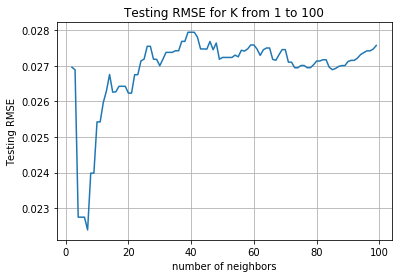

best K for KNN: 7


In [12]:
# train K
K_err = []
K_num = [i for i in range(2,100)]
for k in K_num:
    K_err.append(sgd.KNN(testset, K = k))
plt.plot(K_num, K_err)
plt.xlabel("number of neighbors") 
plt.ylabel("Testing RMSE")
plt.title("Testing RMSE for K from 1 to 100")
plt.grid()
plt.show()
best_K = np.argmin(K_err)+2
print("best K for KNN: {}".format(best_K))

In [8]:
sgd.KNN(testset, K = best_K)

0.02239318132601911

### Using ALS

In [13]:
# set up
als = ALS('../data/ratings.csv')
train_data, test_data = als.split(test_size = 0.2)

TypeError: __init__() takes 2 positional arguments but 3 were given

In [8]:
# tuning parameters
reg_list = [0.1,0.15,0.2,0.25]
rank_list = [5,10,20]
als.gridParams(reg = reg_list, rank = rank_list)
# als.tuningParams(test_data, measure = 'rmse', verbose = False)

In [9]:
# saving parameters
#als_best_params = als.best_params
#pickle.dump(als_best_params, open( "../output/als_best_params.p", "wb" ))
als_best_params = pickle.load(open( "../output/als_best_params.p", "rb" ))
print("Best lambda: {}; \nBest rank: {}".format(als_best_params[1], als_best_params[0]))

Best lambda: 0.1; 
Best rank: 5


In [10]:
# training best model
als.fit(train_data, rank = als_best_params[0], reg = als_best_params[1],elapse = True)

Total time: 21.0957s


In [11]:
als_err = als.err(test_data)
print(als_err)

1.3086509715004353


## NMF